## Initial data cleansing

In [1]:
import pandas as pd
import math 

In [2]:
df = pd.read_csv('/Users/Julian/Documents/CompSci/Numedi-Internship/BostonCrimeMap/tmpeq_466v8.csv', delimiter=',', low_memory=False)

In [3]:
df = df[['OFFENSE_CODE_GROUP', 'Lat', 'Long']]

Index(['OFFENSE_CODE_GROUP', 'Lat', 'Long'], dtype='object')

In [4]:
crime_count = df.groupby(['OFFENSE_CODE_GROUP'])['Lat'].count()
crime_count.head()

OFFENSE_CODE_GROUP
Aggravated Assault                  9480
Aircraft                              48
Arson                                106
Assembly or Gathering Violations    1066
Auto Theft                          5549
Name: Lat, dtype: int64

In [5]:
arson = df[df['OFFENSE_CODE_GROUP'] == 'Arson']
arson.index = range(arson.shape[0])
arson.head()

,OFFENSE_CODE_GROUP,Lat,Long
0,Arson,42.317882,-71.089120
1,Arson,NaN,NaN
2,Arson,42.363392,-71.054881
3,Arson,42.333570,-71.053711
4,Arson,42.268576,-71.095748


In [6]:
robbery = df[df['OFFENSE_CODE_GROUP'] == 'Robbery']
robbery.index = range(robbery.shape[0])
robbery.head()

,OFFENSE_CODE_GROUP,Lat,Long
0,Robbery,42.255730,-71.124849
1,Robbery,42.333807,-71.103778
2,Robbery,42.339269,-71.073084
3,Robbery,42.331898,-71.069082
4,Robbery,42.339034,-71.079973


In [7]:
assault = df[df['OFFENSE_CODE_GROUP'] == 'Aggravated Assault']
assault.index = range(assault.shape[0])
assault.head()

,OFFENSE_CODE_GROUP,Lat,Long
0,Aggravated Assault,42.325610,-71.104500
1,Aggravated Assault,42.332108,-71.070144
2,Aggravated Assault,42.350379,-71.076261
3,Aggravated Assault,42.352312,-71.063705
4,Aggravated Assault,42.352312,-71.063705


In [8]:
fraud = df[df['OFFENSE_CODE_GROUP'] == 'Fraud']
fraud.index = range(fraud.shape[0])
fraud.head()

,OFFENSE_CODE_GROUP,Lat,Long
0,Fraud,NaN,NaN
1,Fraud,42.287889,-71.126586
2,Fraud,42.284315,-71.074108
3,Fraud,42.248917,-71.125883
4,Fraud,42.358848,-71.057928


## Extracting coordinates for certain crimes

In [9]:
assault_coord = []

In [10]:
for i in range(assault.shape[0]):
    if math.isnan(float(assault.iloc[i]['Lat'])):
        continue
    coord = (round(float(assault.iloc[i]['Lat']), 6), round(float(assault.iloc[i]['Long']), 6))
    if i < (assault.shape[0] - 1):
        assault_coord.append('new google.maps.LatLng' +  str(coord) + ',')
    else:
        assault_coord.append('new google.maps.LatLng' +  str(coord))
assault_coord

['new google.maps.LatLng(42.32561, -71.1045),',
 'new google.maps.LatLng(42.332108, -71.070144),',
 'new google.maps.LatLng(42.350379, -71.076261),',
 'new google.maps.LatLng(42.352312, -71.063705),',
 'new google.maps.LatLng(42.352312, -71.063705),',
 'new google.maps.LatLng(42.339269, -71.073084),',
 'new google.maps.LatLng(42.339034, -71.079973),',
 'new google.maps.LatLng(42.324694, -71.100879),',
 'new google.maps.LatLng(42.324694, -71.100879),',
 'new google.maps.LatLng(42.377733, -71.055514),',
 'new google.maps.LatLng(42.29454, -71.086699),',
 'new google.maps.LatLng(42.28407, -71.088249),',
 'new google.maps.LatLng(42.310855, -71.091344),',
 'new google.maps.LatLng(42.35998, -71.054741),',
 'new google.maps.LatLng(42.316966, -71.082541),',
 'new google.maps.LatLng(42.308898, -71.083052),',
 'new google.maps.LatLng(42.308898, -71.083052),',
 'new google.maps.LatLng(42.290876, -71.082741),',
 'new google.maps.LatLng(42.278399, -71.066363),',
 'new google.maps.LatLng(42.306451, -

In [11]:
assault_file = open('assault_file', 'w+')
for i in range(len(assault_coord)):
    assault_file.write(assault_coord[i] + '\n')
assault_file.close()

In [12]:
arson_coord = []

In [13]:
for i in range(arson.shape[0]):
    if math.isnan(float(arson.iloc[i]['Lat'])):
        continue
    coord = (round(float(arson.iloc[i]['Lat']), 6), round(float(arson.iloc[i]['Long']), 6))
    if i < arson.shape[0] - 1:
        arson_coord.append('new google.maps.LatLng' +  str(coord) + ',')
    else:
        arson_coord.append('new google.maps.LatLng' +  str(coord))
arson_coord

['new google.maps.LatLng(42.317882, -71.08912),',
 'new google.maps.LatLng(42.363392, -71.054881),',
 'new google.maps.LatLng(42.33357, -71.053711),',
 'new google.maps.LatLng(42.268576, -71.095748),',
 'new google.maps.LatLng(42.325531, -71.101375),',
 'new google.maps.LatLng(42.325538, -71.065796),',
 'new google.maps.LatLng(42.282455, -71.094488),',
 'new google.maps.LatLng(42.281544, -71.073505),',
 'new google.maps.LatLng(42.33311, -71.097045),',
 'new google.maps.LatLng(42.350959, -71.074128),',
 'new google.maps.LatLng(42.309957, -71.084308),',
 'new google.maps.LatLng(42.326398, -71.111526),',
 'new google.maps.LatLng(42.308898, -71.083052),',
 'new google.maps.LatLng(42.309832, -71.068173),',
 'new google.maps.LatLng(42.340559, -71.070228),',
 'new google.maps.LatLng(42.349897, -71.131434),',
 'new google.maps.LatLng(42.30877, -71.074607),',
 'new google.maps.LatLng(42.300226, -71.074683),',
 'new google.maps.LatLng(42.300226, -71.074683),',
 'new google.maps.LatLng(42.298284,

In [14]:
arson_file = open('arson_file', 'w+')
for i in range(len(arson_coord)):
    arson_file.write(arson_coord[i] + '\n')
arson_file.close()

In [15]:
robbery_coord = []

In [16]:
for i in range(robbery.shape[0]):
    if math.isnan(float(robbery.iloc[i]['Lat'])):
        continue
    coord = (round(float(robbery.iloc[i]['Lat']), 6), round(float(robbery.iloc[i]['Long']), 6))
    if i < robbery.shape[0] - 1:
        robbery_coord.append('new google.maps.LatLng' +  str(coord) + ',')
    else:
        robbery_coord.append('new google.maps.LatLng' +  str(coord))
robbery_coord

['new google.maps.LatLng(42.25573, -71.124849),',
 'new google.maps.LatLng(42.333807, -71.103778),',
 'new google.maps.LatLng(42.339269, -71.073084),',
 'new google.maps.LatLng(42.331898, -71.069082),',
 'new google.maps.LatLng(42.339034, -71.079973),',
 'new google.maps.LatLng(42.355407, -71.063124),',
 'new google.maps.LatLng(42.317766, -71.082077),',
 'new google.maps.LatLng(42.333951, -71.075389),',
 'new google.maps.LatLng(42.359287, -71.053791),',
 'new google.maps.LatLng(42.322911, -71.102489),',
 'new google.maps.LatLng(42.37611, -71.056441),',
 'new google.maps.LatLng(42.355553, -71.152747),',
 'new google.maps.LatLng(42.359196, -71.054638),',
 'new google.maps.LatLng(42.324767, -71.071349),',
 'new google.maps.LatLng(42.285154, -71.091022),',
 'new google.maps.LatLng(42.377445, -71.034108),',
 'new google.maps.LatLng(42.352018, -71.058116),',
 'new google.maps.LatLng(42.250172, -71.114434),',
 'new google.maps.LatLng(42.315384, -71.0987),',
 'new google.maps.LatLng(42.280797,

In [17]:
robbery_file = open('robbery_file', 'w+')
for i in range(len(robbery_coord)):
    robbery_file.write(robbery_coord[i] + '\n')
robbery_file.close()

## Seaborn visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

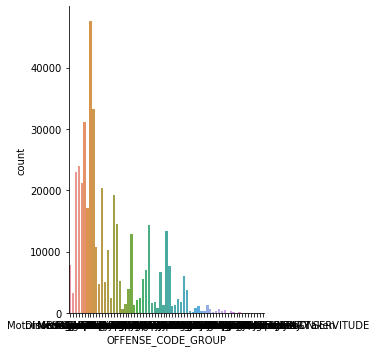

In [19]:
sns.catplot(x='OFFENSE_CODE_GROUP', kind='count', data=df)